In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# get the dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [6]:
X_train.shape  # look at shape of input vectors

(55000, 28, 28, 1)

In [4]:
y_train.shape # shape of labels

(55000,)

In [5]:
np.unique(y_train) # number of unique labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

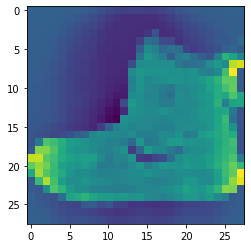

In [39]:
 plt.imshow(X_train[0,:,:,:]) # example image, this is a dataset of different clothing items

In [11]:
#Define our convolutional layer that will use
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

In [12]:
#Define the model
model = keras.models.Sequential([
    #first layer is 64 7x7 filters
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    # pool reduce each spatial dimension by factor of 2
    keras.layers.MaxPooling2D(pool_size=2),
    #Repeat 2 convolution layers followed by one pool twice
    #number of filters increases as go further along
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    #need to flatten input for dense layer because need 1D array for input
    keras.layers.Flatten(),
    #Fully connected network, dropout layer to reduce overfit
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [13]:
#compile and train the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)


Epoch 1/10
1719/1719 [==============================] - 116s 68ms/step - loss: 0.7047 - accuracy: 0.7546 - val_loss: 0.4026 - val_accuracy: 0.8590
Epoch 2/10
1719/1719 [==============================] - 116s 68ms/step - loss: 0.4177 - accuracy: 0.8590 - val_loss: 0.3498 - val_accuracy: 0.8706
Epoch 3/10
1719/1719 [==============================] - 115s 67ms/step - loss: 0.3581 - accuracy: 0.8788 - val_loss: 0.3097 - val_accuracy: 0.8876
Epoch 4/10
1719/1719 [==============================] - 115s 67ms/step - loss: 0.3288 - accuracy: 0.8881 - val_loss: 0.3199 - val_accuracy: 0.8814
Epoch 5/10
1719/1719 [==============================] - 115s 67ms/step - loss: 0.2990 - accuracy: 0.8969 - val_loss: 0.2882 - val_accuracy: 0.8900
Epoch 6/10
1719/1719 [==============================] - 116s 67ms/step - loss: 0.2846 - accuracy: 0.9026 - val_loss: 0.3323 - val_accuracy: 0.8892
Epoch 7/10
1719/1719 [==============================] - 116s 67ms/step - loss: 0.2792 - accuracy: 0.9040 - val_loss: 0

In [17]:
predictions = model.predict(X_valid) # make predictions

In [18]:
predictions.shape # look at shape of output vector

(5000, 10)

In [19]:
predictions[0,:] # look at prediction for first image

array([3.4071624e-01, 1.1433119e-06, 3.8951057e-01, 3.0762218e-03,
       1.1395277e-02, 9.4603315e-08, 2.5526255e-01, 1.1195634e-08,
       3.7573853e-05, 2.1661317e-07], dtype=float32)

In [21]:
predictions[0,:].argmax() # prediction for first image

2

In [23]:
y_valid[0] # actual label for first image
# our model gets this one wrong. Label 0 has 2nd highest probability instead of the highest

0

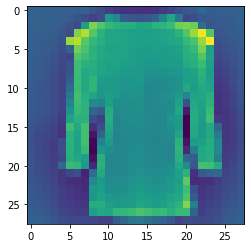

In [24]:
 plt.imshow(X_valid[0,:,:,:]) # the image the model got wrong, maybe a dress?

In [30]:
y_valid[26] # example of label #2

2

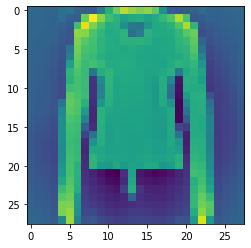

In [32]:
plt.imshow(X_valid[26,:,:,:]) #look at label that model incorectly predicted above, looks like shirt?
# I can understand how the model confused these two

In [26]:
for i in range(10):
    print('Model predicts {} and actual label is {}'.format(predictions[i,:].argmax(),y_valid[i])) # prediction for first image

Model predicts 2 and actual label is 0
Model predicts 8 and actual label is 8
Model predicts 0 and actual label is 0
Model predicts 2 and actual label is 6
Model predicts 5 and actual label is 5
Model predicts 8 and actual label is 8
Model predicts 0 and actual label is 0
Model predicts 4 and actual label is 4
Model predicts 7 and actual label is 7
Model predicts 8 and actual label is 8


In [27]:
# two wrong in first 10